In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('django-packages.csv', sep=';')
df.sort_values(by=['dp_usage_count'], ascending=False)

,dp_slug,dp_category,dp_grids,dp_usage_count,has_valid_repo_url,dp_repo_url,has_valid_repo,platform,repo_id,repo_stars,repo_last_modified,repo_forks,repo_open_issues,repo_topics
1068,django-debug-toolbar,apps,"this-site,developer-tools,data-tools",531,True,https://github.com/django-debug-toolbar/django...,True,github,django-debug-toolbar/django-debug-toolbar,6714.0,2021-11-09T10:21:46:000,950.0,88.0,NaN
4423,south,apps,database-migration,495,False,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
292,django,frameworks,"this-site,file-streaming",434,True,https://github.com/django/django,True,github,django/django,60623.0,2021-11-09T14:49:34:000,25881.0,157.0,"python,django,web,framework,orm,templates,mode..."
2674,django-rest-framework,apps,"rest,api,this-site,django-rest-framework,drf-a...",344,True,https://github.com/tomchristie/django-rest-fra...,True,github,tomchristie/django-rest-framework,22187.0,2021-11-09T14:51:22:000,5932.0,259.0,"python,django,api,rest"
1292,django-extensions,apps,"this-site,developer-tools,fields,shells,cron",294,True,https://github.com/django-extensions/django-ex...,True,github,django-extensions/django-extensions,5552.0,2021-11-08T14:03:01:000,1057.0,123.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,django-mongoforms,apps,mongodb,0,True,https://github.com/stephrdev/django-mongoforms,True,github,stephrdev/django-mongoforms,104.0,2021-02-11T17:19:23:000,29.0,3.0,NaN
2096,django-monitio,apps,messaging,0,True,https://github.com/mpasternak/django-monitio,True,github,mpasternak/django-monitio,103.0,2020-09-14T06:21:59:000,19.0,5.0,NaN
2098,django-monkey-team,apps,error-handling,0,True,https://github.com/ionelmc/django-monkey-team,True,github,ionelmc/django-monkey-team,57.0,2021-07-01T15:10:21:000,1.0,2.0,NaN
2099,django-more-admin-filters,apps,NaN,0,True,https://github.com/thomst/django-more-admin-fi...,True,github,thomst/django-more-admin-filters,19.0,2021-10-01T16:30:33:000,5.0,6.0,NaN


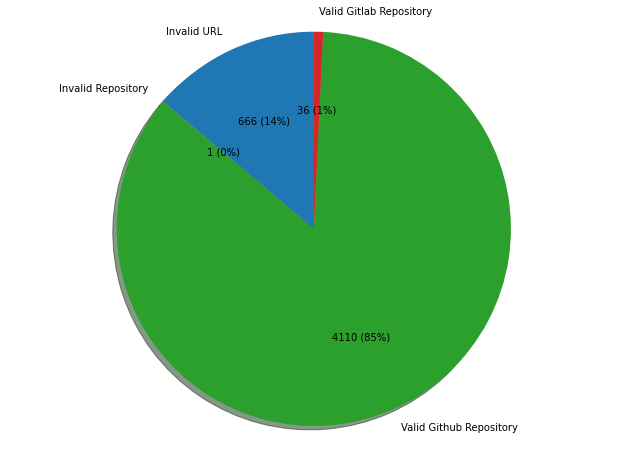

In [2]:
invalid_repo_url = df[~df['has_valid_repo_url']]
invalid_repo = df[(df['has_valid_repo_url']) & (~df['has_valid_repo'])]
valid_repo = df[(df['has_valid_repo_url']) & (df['has_valid_repo'])]
valid_github_repo = valid_repo[valid_repo['platform'] == 'github']
valid_gitlab_repo = valid_repo[valid_repo['platform'] == 'gitlab']

labels = 'Invalid URL', 'Invalid Repository', 'Valid Github Repository', 'Valid Gitlab Repository'

sizes = [
    len(invalid_repo_url), 
    len(invalid_repo), 
    len(valid_github_repo), 
    len(valid_gitlab_repo),
]

def get_pie_label(p):
    absolute = '{:.0f}'.format(p * len(df) / 100)
    percentage = '{0:.0%}'.format(p/100.0)

    return '{} ({})'.format(absolute, percentage)

fig, ax = plt.subplots(figsize=(11, 8))
fig.set_facecolor('white')

ax.pie(sizes, labels=labels, autopct=lambda p: get_pie_label(p),
        shadow=True, startangle=90)

ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.grid()
plt.show()

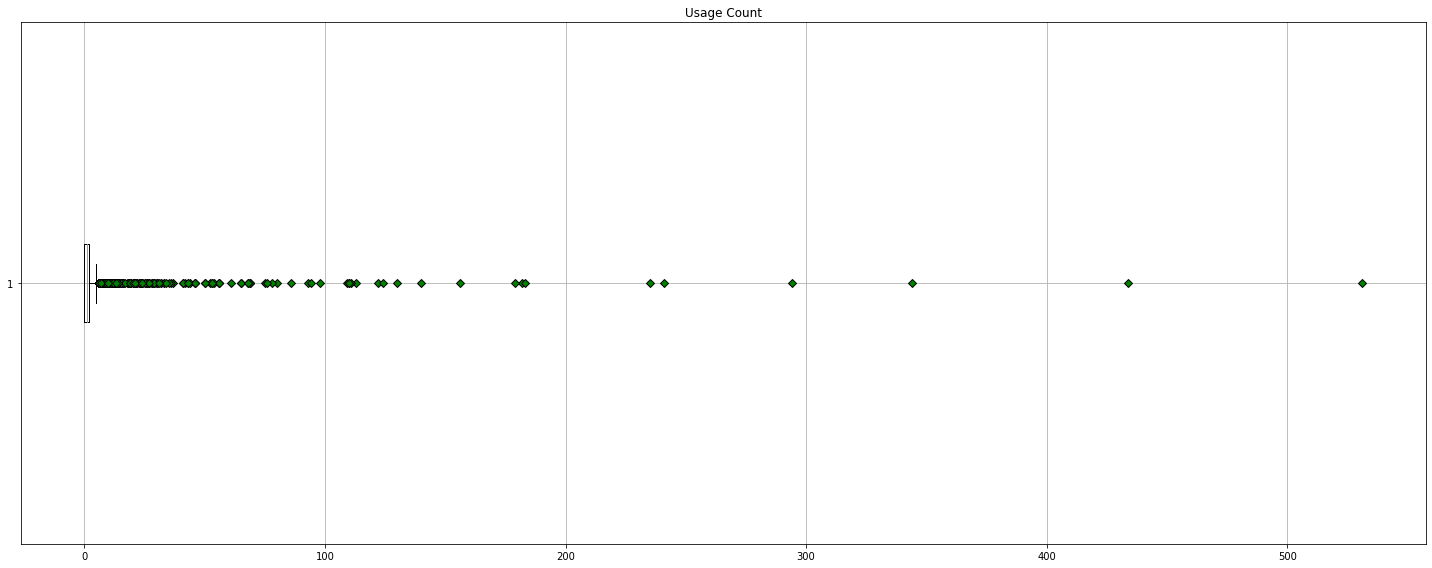

In [3]:
valid_repo = valid_repo[valid_repo['repo_last_modified'] >= '2020-01-01T00:00:00:000']

fig, ax = plt.subplots(figsize=(20, 8))

usage_count = valid_repo['dp_usage_count'].values

ax.boxplot(usage_count, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Usage Count')

plt.tight_layout()
plt.grid()

plt.show()

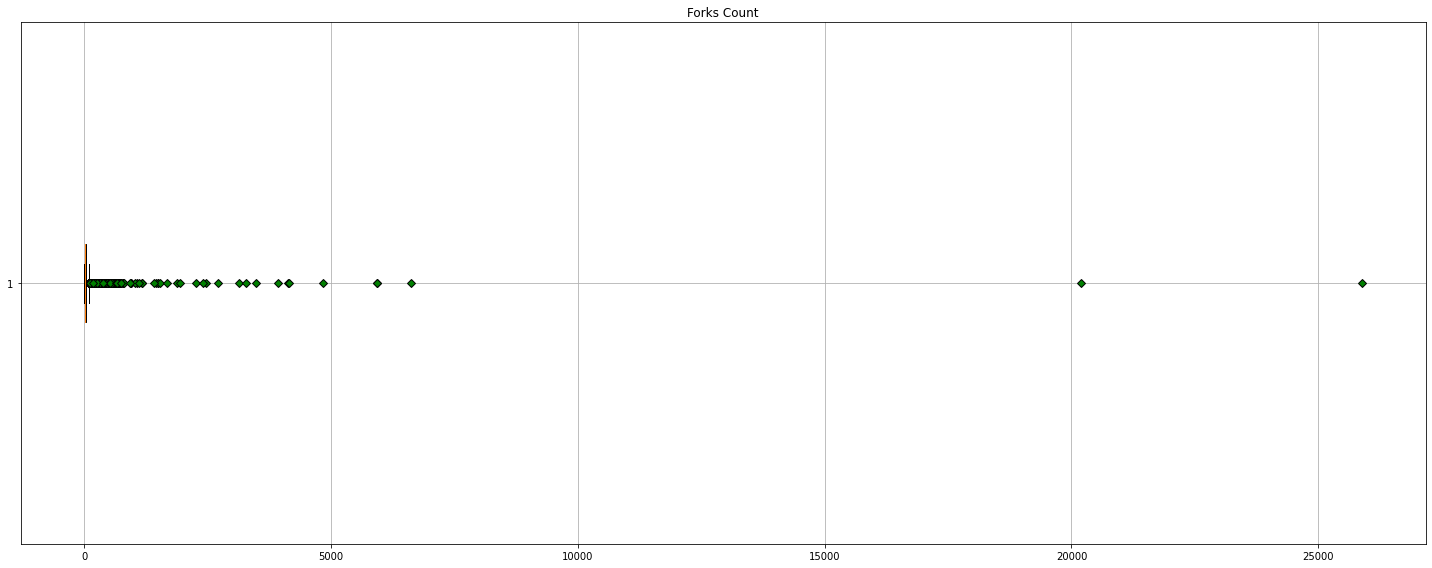

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))

repo_forks = valid_repo['repo_forks'].values

ax.boxplot(repo_forks, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Forks Count')

plt.tight_layout()
plt.grid()

plt.show()

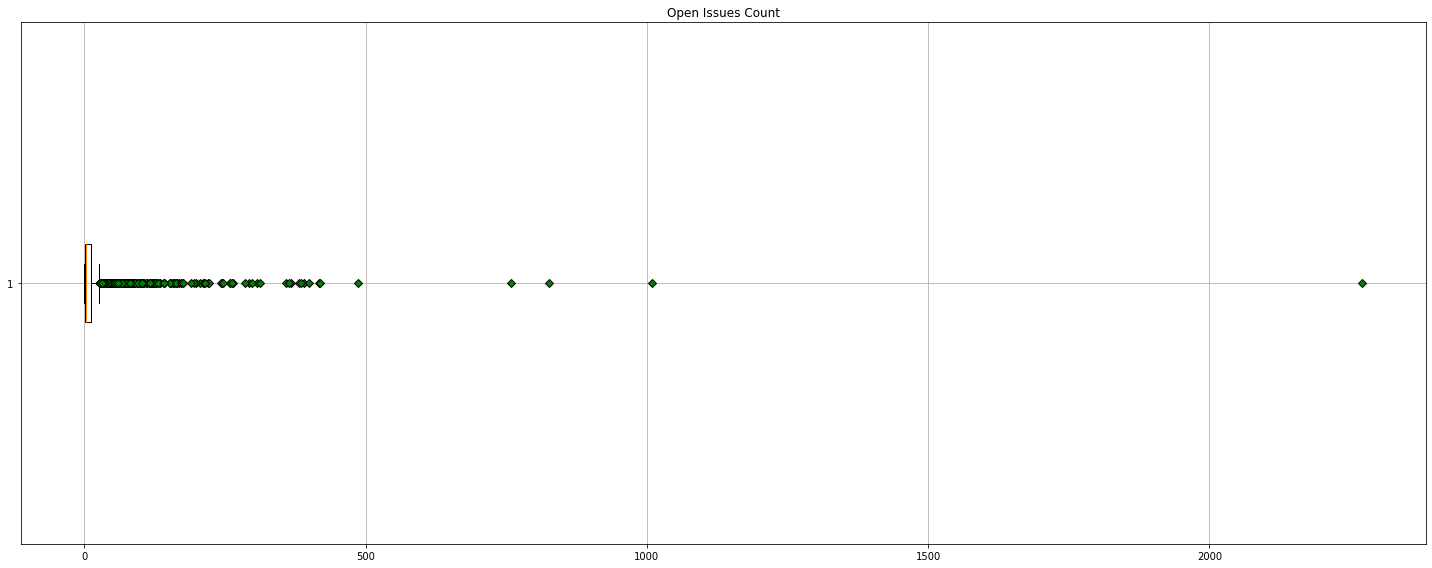

In [5]:
fig, ax = plt.subplots(figsize=(20, 8))

open_issues = valid_repo['repo_open_issues'].values

ax.boxplot(open_issues, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Open Issues Count')

plt.tight_layout()
plt.grid()

plt.show()

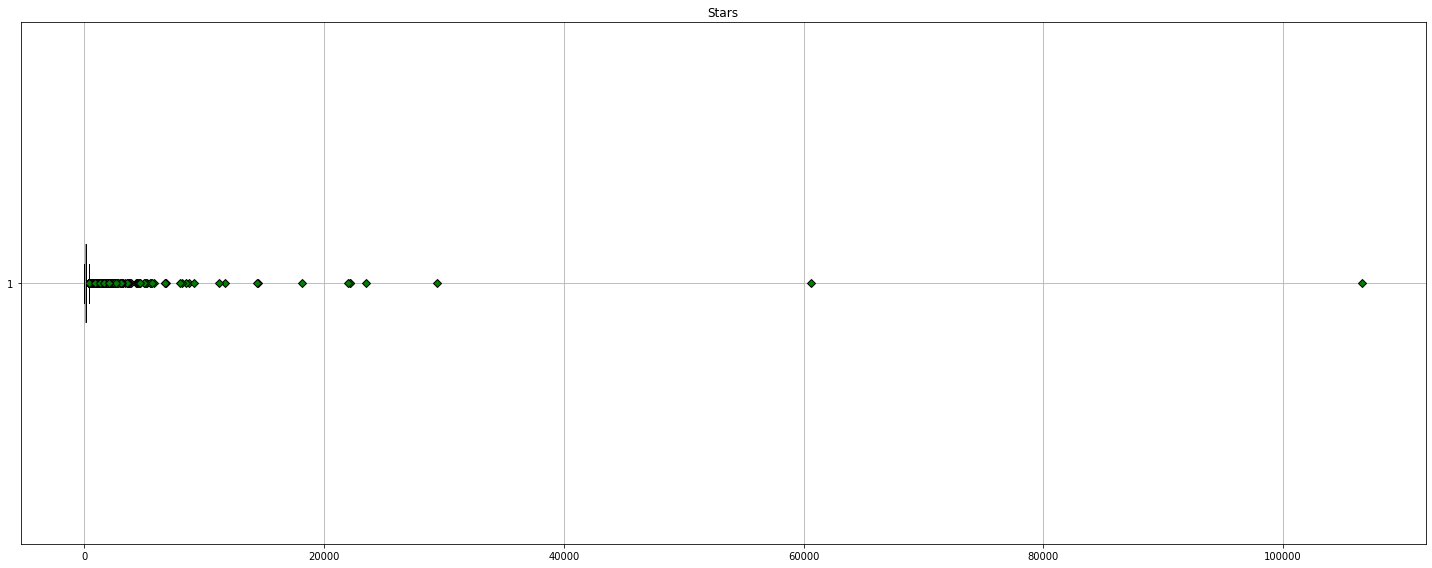

In [6]:
fig, ax = plt.subplots(figsize=(20, 8))

repo_stars = valid_repo['repo_stars'].values

ax.boxplot(repo_stars, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Stars')

plt.tight_layout()
plt.grid()

plt.show()